
# With our dataset, we will try to solve an Image classification problem. Our dataset is mainly divided into two parts (happy and sad).

**We will try to do the following.**

1. Import the necessary libraries for working with data sets.
2. Defining some image extension.
3. We created a directory for the dataset.
4. Exception handling (using try  and except block)
5. Showing images using Matplotlib library.
6. Scaling the dataset.
7. Splitting the Dataset (Train, Validation and Test).
8. In this dataset, We use some TensorFlow built-in functions like (Dense, MaxPooling2D, Flatten,      Dropout, and Conv2D).
9. Defining the input layer, hidden layer, and bridge layer.
10. Summarizing the dataset.
11. Compiling the model.
12. Checking accuracy and value accuracy of our dataset.
13. We evaluated the model with a new image.




# Importing Necessary Library

In [1]:
import tensorflow as tf #  open-source library for creating machine learning models. 
# The OS module in Python provides functions for interacting with the operating system.
# OS comes under Python's standard utility modules.
import os
#cv2 is the module import name for opencv-python,
import cv2
#Numpy for mathematical operation 
import numpy as np
#Matpoltlib for visualizing the data 
import matplotlib.pyplot as plt
#The imghdr module determines the type of image contained in a file or byte stream.
import imghdr
# The warnings filter controls whether warnings are ignored, displayed, or turned into errors.
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Here define some Image Extension(For avoiding Error)
image_extension = ['jpeg','jpg','png','bmp']

In [3]:
# A directory is created here Using OS
# The os.listdir() method in Python gets the files and directories present in a given path.
os.listdir('../input/image-classification/data')

['sad', 'happy']

In [4]:
dataset_dir= '../input/image-classification/data'

In [5]:
dataset_dir= '../input/image-classification/data/'
for imageclassnames in os.listdir(dataset_dir):
    for individualimage in os.listdir(os.path.join(dataset_dir,imageclassnames)):
        imagepath=os.path.join(dataset_dir,imageclassnames,individualimage) 
        #path. join() method in Python join one or more path components intelligently
        try:
            image = cv2.imread(imagepath)
            imagetag = imghdr.what(imagepath)
            if imagetag not in image_extension:
                print('Image Extention is not Correct{}'.format(imagepath))
                os.remove(imagepath)
                
        except Exception as e:
            print('The main issue is {} here,please solve this issue'.format(imagepath))

In [6]:
# Laoding Data set from Present Directory
#Generates a tf.data.Dataset from image files in a directory.
datasets = tf.keras.utils.image_dataset_from_directory(dataset_dir)

Found 305 files belonging to 2 classes.


2022-11-25 15:30:30.643798: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# as_numpy_iterator() returns dicts instead of numpy arrays
datasets_iterate = datasets.as_numpy_iterator()

In [8]:
datasets_batch = datasets_iterate.next()

2022-11-25 15:30:30.819953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


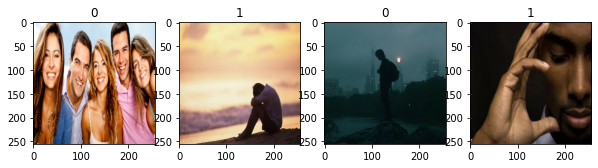

In [9]:
#Here a subplot is created with column 4 and figsize (10,10).
fig,ax = plt.subplots(ncols=4,figsize =(10,10))
for idx, image in enumerate(datasets_batch[0][10:14]):
    ax[idx].imshow(image.astype('int'))
    #imshow() method is used to display an image in a window.
    ax[idx].title.set_text(datasets_batch[1][idx])

In [10]:
def randomImageshow():
    datasets_batch = datasets_iterate.next()
    fig,ax = plt.subplots(ncols=4,figsize =(10,10))
    for idx, image in enumerate(datasets_batch[0][10:14]): #Defining Batch Size of Image.
        ax[idx].imshow(image.astype('int'))
        ax[idx].title.set_text(datasets_batch[1][idx])

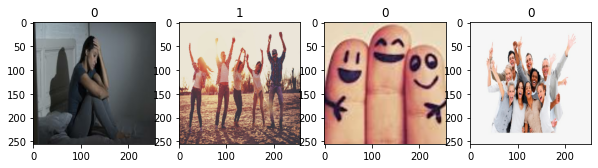

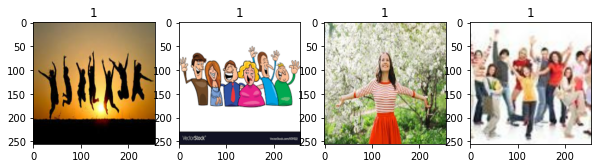

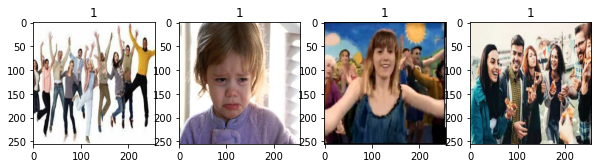

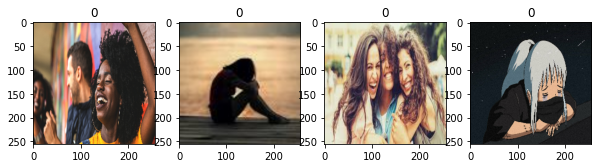

In [11]:
# Showing Random Image into the Dataset using For Loop.
# The For loop in Python is used to iterate over a sequence
# which could be a list, tuple, array, or string. 
for i in range(4):
    randomImageshow()

In [12]:
# Scalling (0 To 1) the Data Using Lambda Function.
datasetsScalling = datasets.map(lambda x,y:(x/255,y))

In [13]:
datasetsScalling.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


(array([[[[0.91764706, 0.93333334, 0.8039216 ],
          [0.91764706, 0.9319087 , 0.8053462 ],
          [0.91764706, 0.92941177, 0.80784315],
          ...,
          [0.33952206, 0.41403186, 0.32775736],
          [0.35900736, 0.4360141 , 0.34224877],
          [0.37504596, 0.45347732, 0.3554381 ]],
 
         [[0.9159773 , 0.92999387, 0.80726105],
          [0.9159773 , 0.9291758 , 0.80807906],
          [0.9159773 , 0.92774206, 0.8115348 ],
          ...,
          [0.33886328, 0.41504282, 0.32375914],
          [0.35733762, 0.43495095, 0.33936587],
          [0.37337622, 0.4518076 , 0.3508333 ]],
 
         [[0.9140625 , 0.9251532 , 0.81277573],
          [0.9140625 , 0.9251532 , 0.81277573],
          [0.9140625 , 0.9251532 , 0.8174225 ],
          ...,
          [0.33841392, 0.4168453 , 0.31836703],
          [0.35520822, 0.4336396 , 0.33526337],
          [0.3711244 , 0.44955575, 0.34443426]],
 
         ...,
 
         [[0.90588236, 0.9137255 , 0.83137256],
          [0.90588

In [14]:
# The dataset is divided into 3 parts.
# Traincatagory = 70%,Validationcatagory = 20% and Testcatagory = 10%
traincatagory = int(len(datasets)*.7)
validationcatagory = int(len(datasets)*.2)
testcatagory = int(len(datasets)*.1)

In [15]:
train = datasetsScalling.take(traincatagory)
validation = datasetsScalling.skip(traincatagory).take(validationcatagory)
test = datasetsScalling.skip(traincatagory+validationcatagory).take(testcatagory)

In [16]:
# From Tensorflow open-source library We are importing.
# Layers---> Dense,MaxPooling2D,Flatten,Dropout,Conv2D
# Models---> Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dropout,Conv2D
from tensorflow.keras.models import Sequential

In [17]:
# Sequential API is used to create models layer-by-layer.
model = Sequential()
#Input layer
# 1.Kernel Size->An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
# 2.Relu-> Activation Function
# 3. Input Shape->In Keras, the input layer itself is not a layer, but a tensor.
# 3.1 It's the starting tensor you send to the first hidden layer. 
model.add(Conv2D(16, kernel_size=(3,3), strides=1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Frist Hidden Layer
model.add(Conv2D(32, kernel_size=(3,3), strides=1,activation='relu'))
model.add(MaxPooling2D())

#Second Hidden Layer
model.add(Conv2D(64, kernel_size=(3,3), strides=1,activation='relu'))
model.add(MaxPooling2D())

# Bridge Layer
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [18]:
# The model summary table reports the strength of the relationship between the model and the dependent variable
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [19]:
# Compile defines the loss function, the optimizer and the metrics.
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [20]:
os.makedirs('../working/logs')

In [21]:
log_dir = '../working/logs'

In [22]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = log_dir) 

2022-11-25 15:30:37.331496: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-25 15:30:37.331568: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-25 15:30:37.332820: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [23]:
# Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. 
# A model that is well-fitted produces more accurate outcomes.
history = model.fit(train,
                   epochs=20,
                   validation_data=validation,
                   callbacks=[tensorboard])

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 18s - loss: 0.6937 - accuracy: 0.4688

2022-11-25 15:30:40.546973: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-25 15:30:40.547023: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/7 [=======>......................] - ETA: 2s - loss: 2.8907 - accuracy: 0.4531 

2022-11-25 15:30:41.040694: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-25 15:30:41.047884: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-25 15:30:41.061253: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_25_15_30_41

2022-11-25 15:30:41.062780: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ../working/logs/train/plugins/profile/2022_11_25_15_30_41/1a5225c0ccdc.trace.json.gz
2022-11-25 15:30:41.078830: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_25_15_30_41

2022-11-25 15:30:41.079729: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ../working/logs/train/plugins/profile/2022_11_25_15_30_41/1a5225c0ccdc.memory_p

7/7 [==============================] - ETA: 0s - loss: 2.3013 - accuracy: 0.4688

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 832ms/step - loss: 2.3013 - accuracy: 0.4688 - val_loss: 0.8220 - val_accuracy: 0.5312
Epoch 2/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.5268

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 847ms/step - loss: 0.7067 - accuracy: 0.5268 - val_loss: 0.6184 - val_accuracy: 0.5312
Epoch 3/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.6518

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 797ms/step - loss: 0.6100 - accuracy: 0.6518 - val_loss: 0.5453 - val_accuracy: 0.7969
Epoch 4/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.4851 - accuracy: 0.8080

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 830ms/step - loss: 0.4851 - accuracy: 0.8080 - val_loss: 0.3406 - val_accuracy: 0.8594
Epoch 5/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.8304

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 798ms/step - loss: 0.4217 - accuracy: 0.8304 - val_loss: 0.3665 - val_accuracy: 0.8594
Epoch 6/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.3417 - accuracy: 0.8839

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 820ms/step - loss: 0.3417 - accuracy: 0.8839 - val_loss: 0.2667 - val_accuracy: 0.9531
Epoch 7/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.2319 - accuracy: 0.9375

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 804ms/step - loss: 0.2319 - accuracy: 0.9375 - val_loss: 0.1390 - val_accuracy: 0.9531
Epoch 8/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9375

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 844ms/step - loss: 0.1919 - accuracy: 0.9375 - val_loss: 0.1777 - val_accuracy: 0.9375
Epoch 9/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9554

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 788ms/step - loss: 0.1762 - accuracy: 0.9554 - val_loss: 0.1633 - val_accuracy: 0.9531
Epoch 10/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.9821

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 797ms/step - loss: 0.1042 - accuracy: 0.9821 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 11/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9732

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 840ms/step - loss: 0.0803 - accuracy: 0.9732 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 12/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 805ms/step - loss: 0.0482 - accuracy: 0.9911 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 13/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 795ms/step - loss: 0.0464 - accuracy: 0.9911 - val_loss: 0.0517 - val_accuracy: 0.9844
Epoch 14/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 786ms/step - loss: 0.0280 - accuracy: 0.9955 - val_loss: 0.0434 - val_accuracy: 0.9844
Epoch 15/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 808ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 16/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 808ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 17/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 866ms/step - loss: 0.0205 - accuracy: 0.9955 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 18/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 791ms/step - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.0193 - val_accuracy: 0.9844
Epoch 19/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 787ms/step - loss: 0.0115 - accuracy: 0.9955 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 20/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 7s 794ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

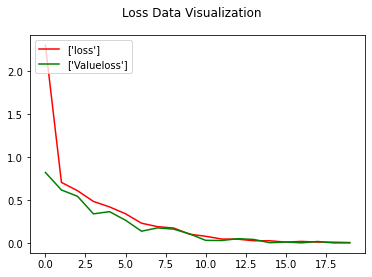

In [25]:
fig=plt.figure()
plt.plot(history.history['loss'],color = 'red', label=['loss'])
plt.plot(history.history['val_loss'],color = 'green', label=['Valueloss'])
plt.suptitle('Loss Data Visualization')
plt.legend(loc = 'upper left')
plt.show()

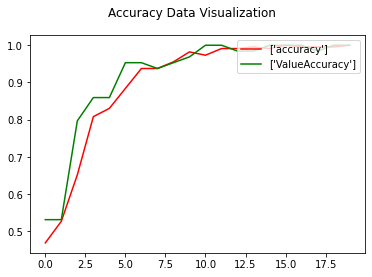

In [26]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color = 'red', label=['accuracy'])
plt.plot(history.history['val_accuracy'],color = 'green', label=['ValueAccuracy'])
plt.suptitle('Accuracy Data Visualization')
plt.legend(loc = 'upper right')
plt.show()

In [27]:
# Precision->The quality or state of being precise.
# Recall->To bring back from memory.
# BinaryAccuracy->This metric creates two local variables, 
# Total and count that are used to compute the frequency with which y_pred matches y_true 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
Precision_Data = Precision()
Recall_Data = Recall()
Binary_Accuracy_Data = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
    x,y =batch
    y_predict = model.predict(x)
    Precision_Data(y,y_predict)
    Recall_Data(y,y_predict)
    Binary_Accuracy_Data(y,y_predict)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [30]:
print(Precision_Data.result())
print(Recall_Data.result())
print(Binary_Accuracy_Data.result())


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


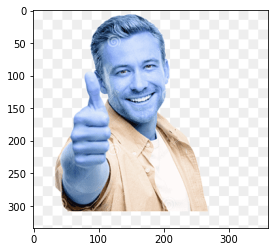

In [31]:
testImageData = cv2.imread('../input/smileimage/Smile_image.png')
plt.imshow(testImageData)
plt.show()

In [32]:
# Resizing the Image.
resizeImageData =tf.image.resize(testImageData,(256,256))

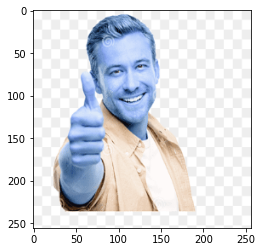

In [33]:
plt.imshow(resizeImageData.numpy().astype('int'))
plt.show()

In [34]:
testImageDataPredict = model.predict(np.expand_dims(resizeImageData/255,0))

In [35]:
if testImageDataPredict>0.5:
    print('Happy Image')
else:
    print('Sad Image')

Happy Image


# Summary of our model
First we import some necessary libraries to work with the dataset. We have visualized some images using CV2 module so that we can see how the images are inside the dataset. Split the dataset into 3 parts(Train, Validation and Test). We have created 1 input layer, 2 hidden layers, and an output layer where Relu is used as an activation function for the hidden layer and the Kernel size is(3,3). For the last layer, we used sigmoid as the activation function, because the dataset we use has 2 classes, this is a binary classification problem. We created a summary of the model to see how the functions inside our model are working. We used 20 epochs to see how our model's accuracy and value accuracy fared for each epoch. Tried data visualization to see what the graph of loss and accuracy looks like. Finally, we tried using a new image to determine if our model was working correctly.

# Thanks For Reading This
I especially thank Google.